# Importing librarires

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import datetime
import statsmodels.api as sm

start = datetime.datetime(1979, 1, 1)
end = datetime.datetime(2017, 12, 31)

plt.style.use("seaborn-white")
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
df = web.DataReader([
    "ETOTALUSQ176N",
    "RHORUSQ156N",
    "MSACSR",
    "USSTHPI",
    "HOUST"
], 
    'fred', start, end)

df.columns = [
    "Housing Inventory Estimate",
    "Homeownership Rate",
    "Supply of Houses",
    "All-Transactions House Price Index",
    "Housing Starts",
]
df.index.name = "Date"

df = df.resample("QS").mean()

In [3]:
df.head()

,Housing Inventory Estimate,Homeownership Rate,Supply of Houses,All-Transactions House Price Index,Housing Starts
Date,,,,,
1979-01-01,NaN,64.8,6.666667,91.38,1665.666667
1979-04-01,NaN,64.9,7.100000,94.37,1845.666667
1979-07-01,NaN,65.8,7.133333,96.38,1790.000000
1979-10-01,NaN,65.4,8.100000,98.29,1567.666667
1980-01-01,NaN,65.5,8.766667,100.00,1246.000000


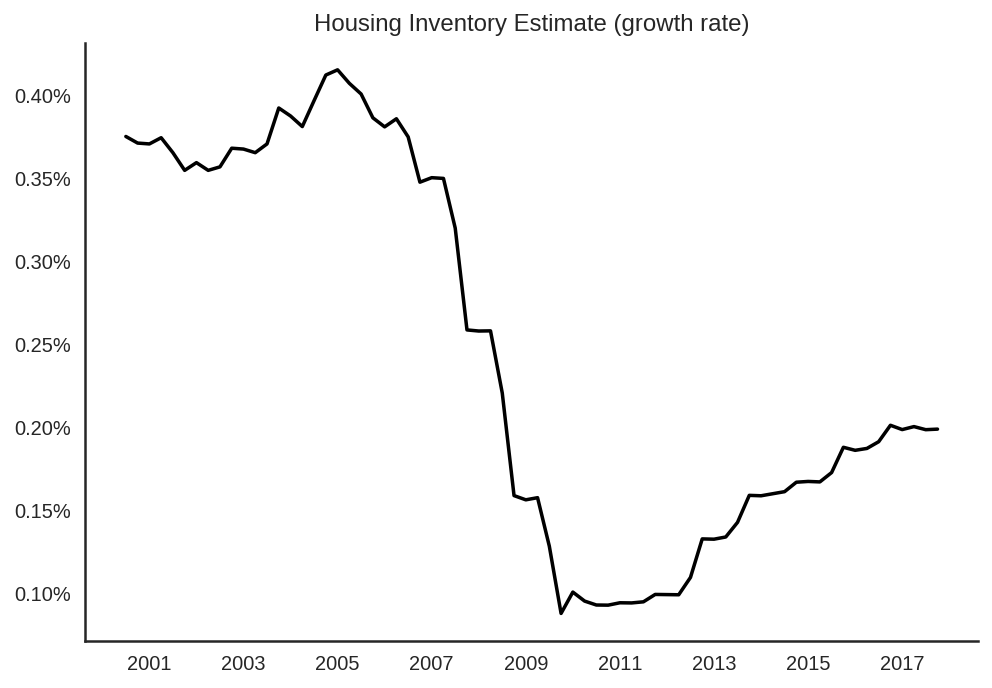

In [47]:
ax = df["Housing Inventory Estimate"].pct_change().plot(title = "Housing Inventory Estimate (growth rate)", color = "black")
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
plt.xlabel("")
sns.despine()
plt.show()

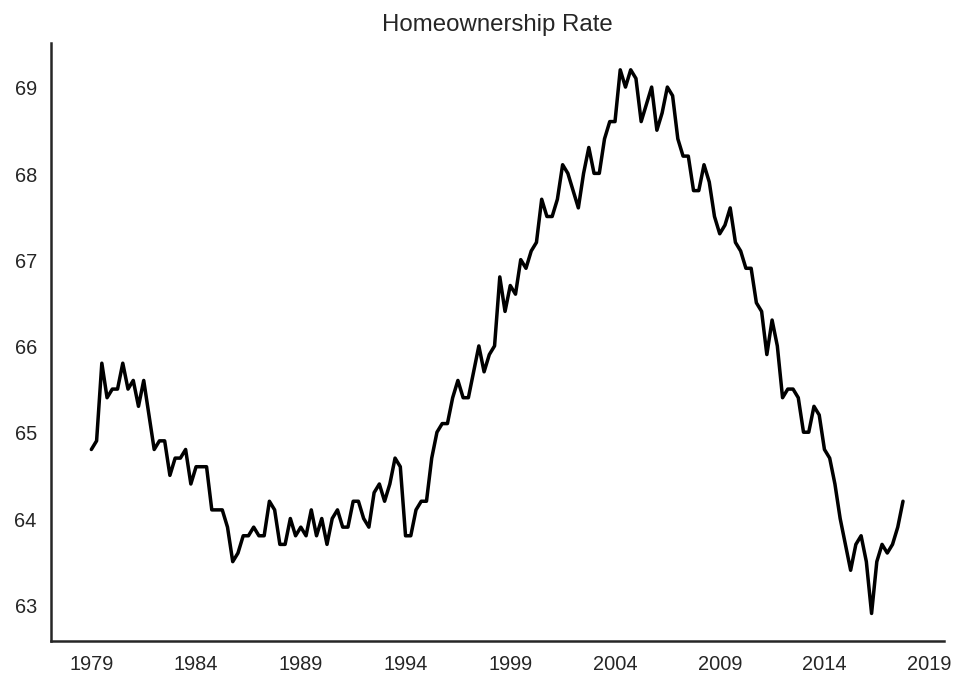

In [17]:
df["Homeownership Rate"].plot(title = "Homeownership Rate", color = "black")
sns.despine()
plt.xlabel("")
plt.show()

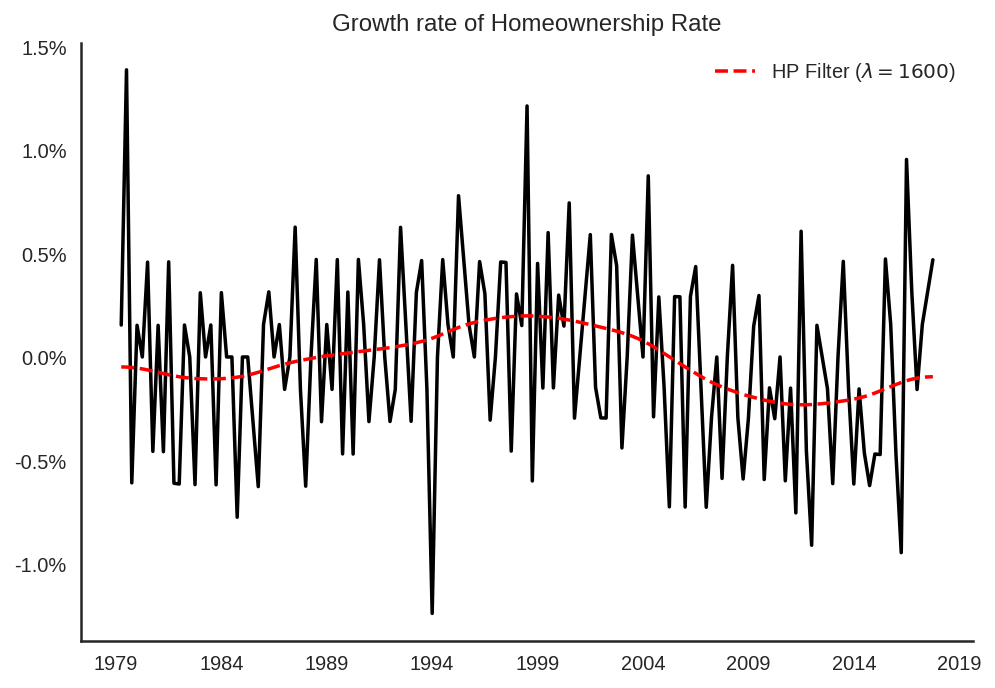

In [38]:
cycle, trend = sm.tsa.filters.hpfilter(df["Homeownership Rate"], 1600)
ax = df["Homeownership Rate"].pct_change().plot(title = "Growth rate of Homeownership Rate", color = "black")
trend.pct_change().plot(color="red", ls="--", label = "HP Filter ($\lambda = 1600$)", legend = True, ax = ax)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.xlabel("")
plt.show()

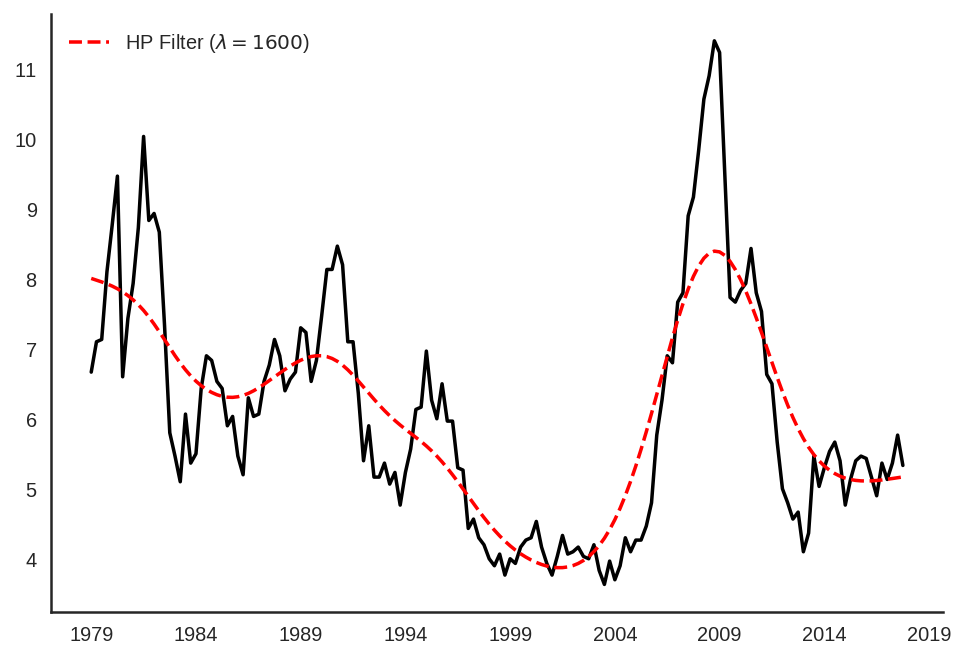

In [44]:
cycle, trend = sm.tsa.filters.hpfilter(df["Supply of Houses"], 1600)
ax = df["Supply of Houses"].plot(color = "black")
trend.plot(color="red", ls="--", label = "HP Filter ($\lambda = 1600$)", legend = True, ax = ax)
sns.despine()
plt.xlabel("")
plt.show()